#### Salary Project -  Vinayak Ratan

## Predicting the salary using the features provided

In [1]:
# import the necessay libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the salary dataset
sal_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
sal_df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
# showing the top five and bottom five rows of salary data
print('\n','-'*20,'Top five rows of Salary data','-'*20,'\n')
print(sal_df.head())

print('\n','-'*20,'Bottom five rows of Salary data','-'*20,'\n')
print(sal_df.tail())


 -------------------- Top five rows of Salary data -------------------- 

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

 -------------------- Bottom five rows of Salary data -------------------- 

         rank discipline  yrs.since.phd  yrs.service   sex  salary
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035


In [4]:
# Column names of the dataset
sal_df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

### Checking for null values

In [5]:
sal_df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

- There are no null values present in the given dataset

In [6]:
# Checking the info of column attributes
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


- rank, discipline and sex are object datatype
- yrs.since.phd, yrs.service and salary are integer datatype

- Before applying the models to the dataset we need to convert the categorical data into numerical using Encoding (will be done after EDA)

### Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='rank', ylabel='salary'>

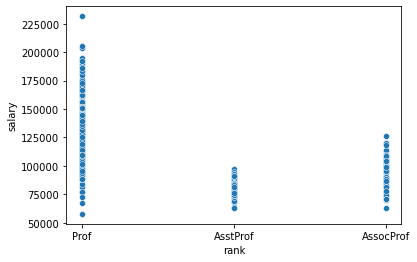

In [7]:
sns.scatterplot(x='rank', y = 'salary', data=sal_df )

- We see here that faculty with Professor rank is highly paid, followed by Associate Professor and then Assistant Professor and equally distributed in the salary range of 55000 to 100000

<AxesSubplot:xlabel='discipline', ylabel='salary'>

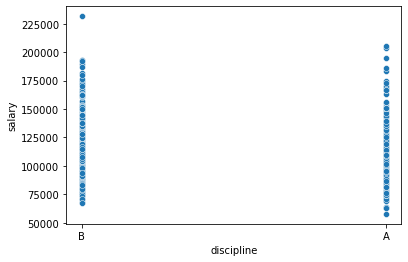

In [8]:
sns.scatterplot(x='discipline', y = 'salary', data=sal_df )

###### For better understanding of data, we will plot the each features

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

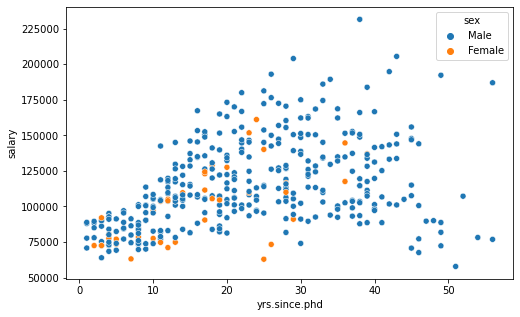

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='yrs.since.phd', y = 'salary', data=sal_df, hue = 'sex' )

- Shows with increase in experience after PhD, salary increases both in male and female, but females have less salary when compared with males.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

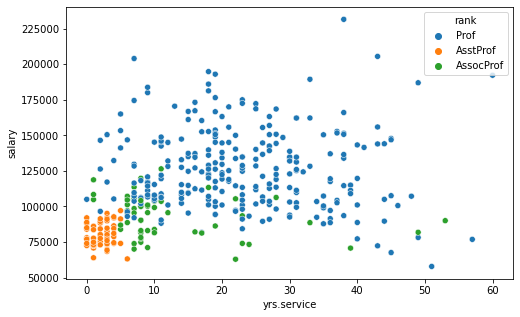

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='yrs.service', y = 'salary', data=sal_df, hue = 'rank')

- Assistant Professor have less salary followed by Associate Professor and Professor. 
- With expereince the rank and salary increases

<Figure size 576x360 with 0 Axes>

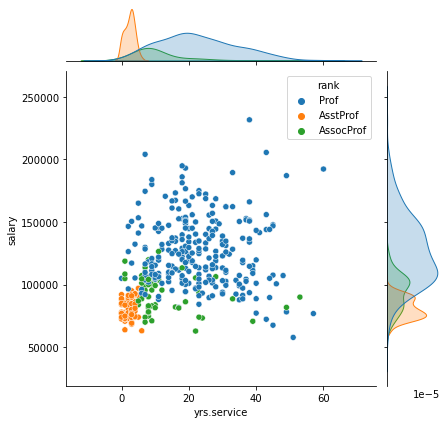

In [11]:
plt.figure(figsize=(8,5))
sns.jointplot(x='yrs.service', y = 'salary', data=sal_df, hue = 'rank')

- With experience the salary for Professor rank and Associate Professor increases more with expereince than Assistant Professor.
- The ranks have normally distributed. 
    - Assistant Professor salary spread is less
    - Associate Professor salary spread little more than Asst Prof.
    - Professor salary is widely spread

<AxesSubplot:xlabel='sex', ylabel='salary'>

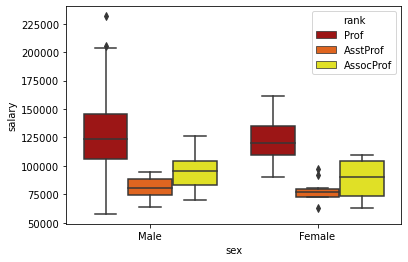

In [12]:
sns.boxplot(x='sex', y = 'salary', data=sal_df, hue = 'rank', palette='hot')

- Male faculty salary range
    - Assistant Professor: around 60000 to 90000 with median being 76000
    - Associate Professor: around 70000 to 130000 with median being 90000
    - Professor: 58000 to 235000 with median being 125000 (few outliers) 
- Female faculty salary range
    - Assistant Professor: around 60000 to 100000 with median being 75000 (few outliers)
    - Associate Professor: around 60000 to 120000 with median being 85000
    - Professor: 80000 to 170000 with median being 120000

<AxesSubplot:xlabel='sex', ylabel='salary'>

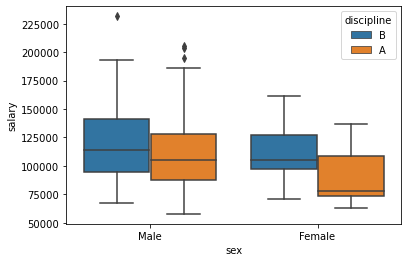

In [13]:
sns.boxplot(x='sex', y = 'salary', data=sal_df, hue = 'discipline')

- Salary based on discipline A
    - Male Faculty: salary range from 60000 to 205000 with median being 110000 (few outliers)
    - Female Faculty: salary range from 67000 to 140000 with median being 80000
- Salary based on discipline B
    - Male Faculty: salary range from 70000 to 230000 with median being 115000 (few outliers)
    - Female Faculty: salary range from 75000 to 170000 with median being 110000

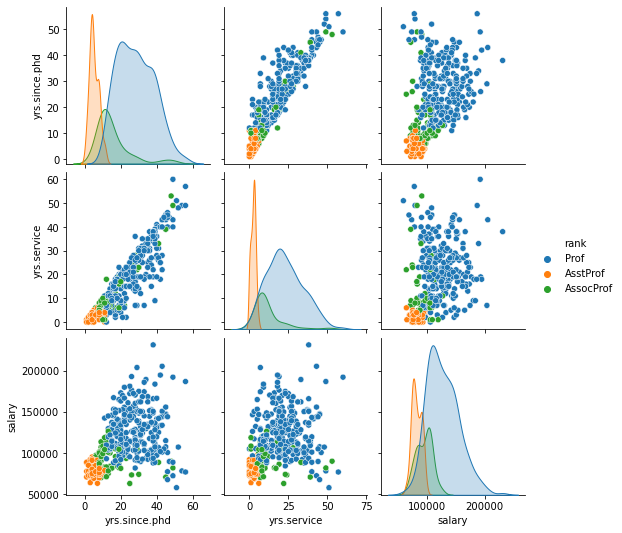

In [14]:
sns.pairplot(data=sal_df, hue='rank')

- Salary increases with increase in expereince and also with PhD. Also increases with rank
- distribution curve shows presence of little skewness

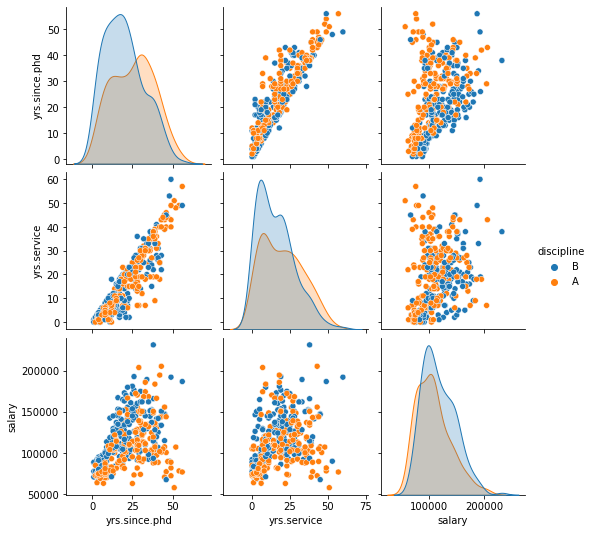

In [15]:
sns.pairplot(data=sal_df, hue='discipline')

- salary with respect to both discipline increases with expereince
- data distribution almost normal with little skewness

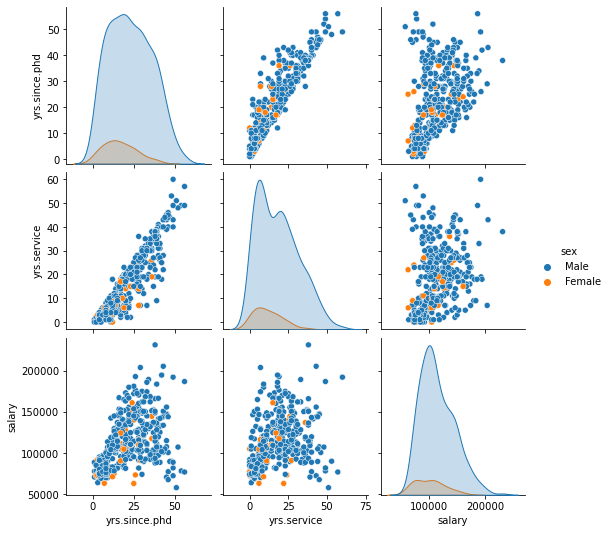

In [16]:
sns.pairplot(data=sal_df, hue='sex')

- As pointed out earlier, salary increases with expereince both in male and female.
- The female faculty are less

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


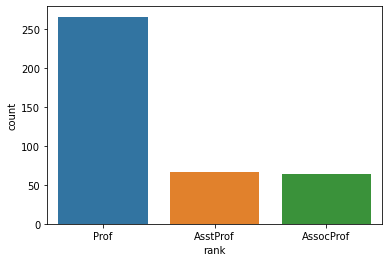

In [17]:
#  Determining the count of categorical data columns
sns.countplot(sal_df['rank'])
print(sal_df['rank'].value_counts())

- Faculty with Professor (266) rank are more compared to Associate Professor (64) and Assistant Professor(67)

B    216
A    181
Name: discipline, dtype: int64


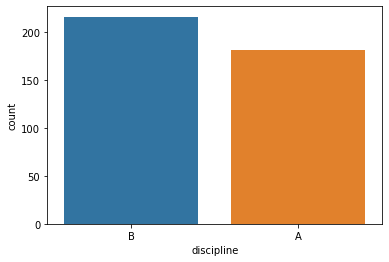

In [18]:
sns.countplot(sal_df['discipline'])
print(sal_df['discipline'].value_counts())

- Total faculty in each discipline
    - A: 181
    - B: 216

Male      358
Female     39
Name: sex, dtype: int64


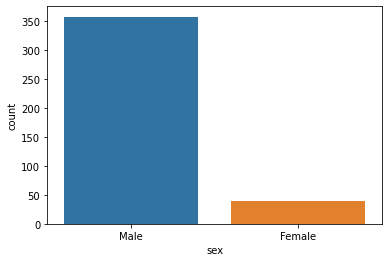

In [19]:
sns.countplot(sal_df['sex'])
print(sal_df['sex'].value_counts())

- There are more male faculty equal to 358 than female faculty equal to 39

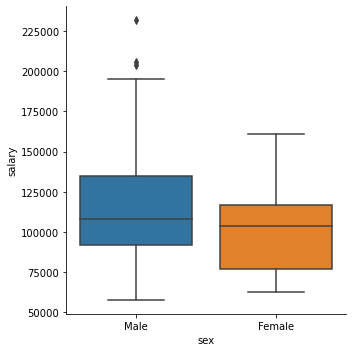

In [20]:
sns.catplot(x='sex', y = 'salary', data=sal_df, kind = 'box')

- Male salary range: 58000 to 230000, median - 110000 (few outliers)
- Female salary range: 60000 to 170000, median - 105000

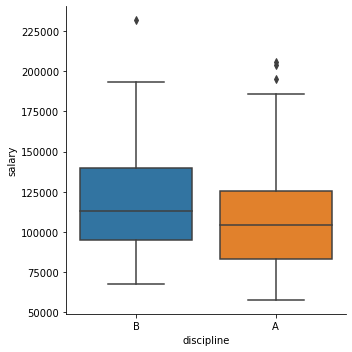

In [21]:
sns.catplot(x='discipline', y = 'salary', data=sal_df, kind = 'box')

- Discipline A salary range: 58000 to 210000, median - 105000 (few outliers)
- Discipline B salary range: 70000 to 230000, median - 110000 (few outliers)

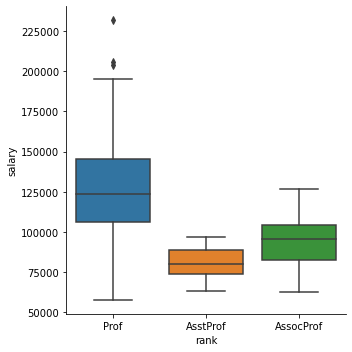

In [22]:
sns.catplot(x='rank', y = 'salary', data=sal_df, kind = 'box')

- Rank Assistant Professor salary range: 65000 to 90000, median - 77000
- Rank Associate Professor salary range: 65000 to 130000, median - 90000
- Rank Professor salary range: 60000 to 230000, median - 125000 (few outliers)

### Encoding the categorical variables

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

lst = ['rank','discipline', 'sex']
for val in lst:
    sal_df[val]=le.fit_transform(sal_df[val].astype(str))

sal_df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [25]:
# checking the dataset data type after encoding
sal_df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

### Descriptive Statistics

In [26]:
sal_df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


- yrs since PhD
    - Mean: 22.31
    - median: 21
    - std deviation: 12.88
- yrs service
    - Mean: 17.61
    - median: 16
    - std deviation: 13.006
- Salary
    - Mean: 113706.45
    - median: 107300
    - std deviation: 30289.03

- Since, there is not much difference in the mean and median of the features, the data has few outliers

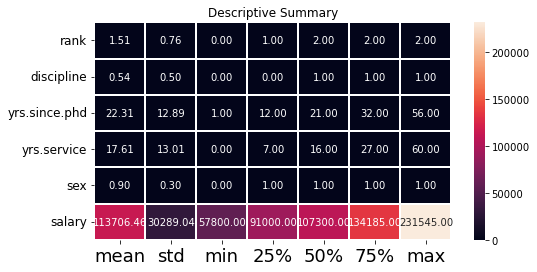

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(round(sal_df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='.2f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Descriptive Summary")
plt.savefig('Heatmap_desc_salary.png')
plt.show()

### Correlation

In [28]:
sal_df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [29]:
sal_df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

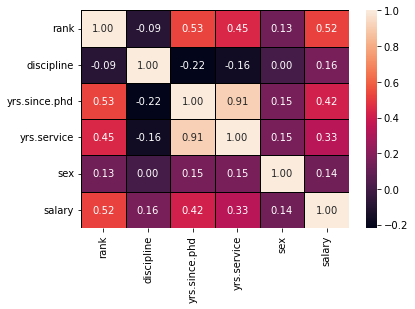

In [30]:
# Heatmap
sns.heatmap(sal_df.corr(), annot=True, linewidth=0.5,linecolor='black', fmt='.2f')

- Outcome of Correlation
    - sex and discipline have weak bond with the target
    - rank, yrs.since.phd, yrs.service have a strong bond with target

### Checking outliers

In [31]:
col = sal_df.columns[2:].values
col

array(['yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype=object)

rank                AxesSubplot(0.125,0.536818;0.227941x0.343182)
discipline       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
yrs.since.phd    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
yrs.service            AxesSubplot(0.125,0.125;0.227941x0.343182)
sex                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
salary              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

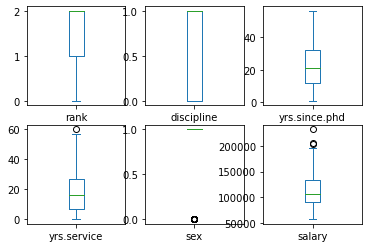

In [32]:
sal_df.plot(kind='box', subplots = True, layout = (2,3))

- As said earlier there are few outliers present in the data.

### Removing Outliers

In [33]:
from scipy.stats import zscore
z_sal = np.abs(zscore(sal_df))
z_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,0.179854,0.124300,0.330058,1.966672
2,0.672564,0.915403,1.422982,1.125098,0.330058,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.330058,0.350418
393,0.649257,1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.330058,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.330058,0.607502


In [34]:
# List of array containing z-score greater than 3
np.where(z_sal>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [35]:
z_sal.shape

(397, 6)

In [36]:
z_sal.iloc[9,4]

3.0297668523315746

In [37]:
sal_df_new = sal_df[(z_sal<3).all(axis=1)]
sal_df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [38]:
print("Old DataFrame:-", sal_df.shape)
print("New DataFrame:-", sal_df_new.shape)
print('Total dropped rows:-', sal_df.shape[0]-sal_df_new.shape[0])

Old DataFrame:- (397, 6)
New DataFrame:- (354, 6)
Total dropped rows:- 43


In [39]:
# Percentage loss of data
loss_percent_sal = (397-354)/354*100
print(loss_percent_sal,'%')

12.146892655367232 %


- Since the dataset is small, the percentage loss is more than 10%, we will not remove outliers for training

### Skewness

In [40]:
sal_df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

- Outcome of skewness: Skewness threshold is taken as +/- 0.65
- columns which are having skewness - rank, sex

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

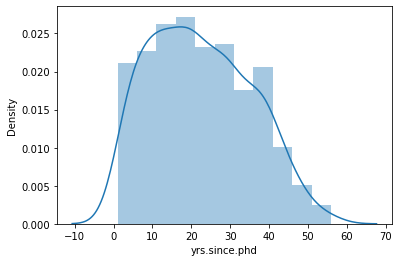

In [45]:
# Distribution Plot - Done for only numerical column not for categoical data
sns.distplot(sal_df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

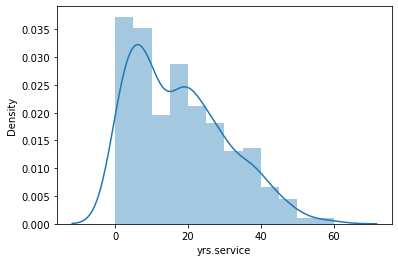

In [46]:
sns.distplot(sal_df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

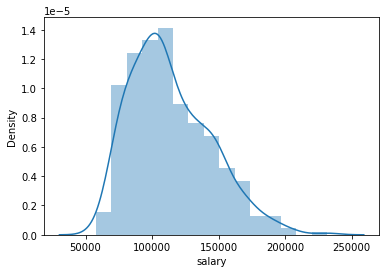

In [47]:
sns.distplot(sal_df['salary'])

- Data is normally distribute with little skewness

### Dividing data in features & vectors

In [48]:
x1 = sal_df.iloc[:,:-1]
x1

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [49]:
y1=sal_df.iloc[:,-1]
y1

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

### Scaling the data using MinMaxScaler

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms_sal = MinMaxScaler()
x1=mms_sal.fit_transform(x1)
x1

array([[1.        , 1.        , 0.32727273, 0.3       , 1.        ],
       [1.        , 1.        , 0.34545455, 0.26666667, 1.        ],
       [0.5       , 1.        , 0.05454545, 0.05      , 1.        ],
       ...,
       [1.        , 0.        , 0.74545455, 0.41666667, 1.        ],
       [1.        , 0.        , 0.43636364, 0.25      , 1.        ],
       [0.5       , 0.        , 0.12727273, 0.06666667, 1.        ]])

### Training the dataset 

##### Linear Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sal_lr = LinearRegression()
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [53]:
for i in range(0,100):
    x_train, x_test,y_train, y_test = train_test_split(x1,y1, random_state=i, test_size=0.30)
    sal_lr.fit(x_train, y_train)
    pred_train = sal_lr.predict(x_train)
    pred_test= sal_lr.predict(x_test)
    print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
    print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
    print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('*'*100,'\n')

Mean absolute error:-  17425.288990401226
Mean squared error:-  440998058.3178473
Root mean squared error:-  20999.953769421667
At random state 0, the training accuracy is: 0.35238978918304
At random state 0, the testing accuracy is: 0.3944705006995438
**************************************************************************************************** 

Mean absolute error:-  18652.584185514017
Mean squared error:-  583719915.229408
Root mean squared error:-  24160.29625707036
At random state 1, the training accuracy is: 0.37981683378332454
At random state 1, the testing accuracy is: 0.31750956770569305
**************************************************************************************************** 

Mean absolute error:-  18633.311760668985
Mean squared error:-  601244064.314487
Root mean squared error:-  24520.278634519775
At random state 2, the training accuracy is: 0.41023070933432815
At random state 2, the testing accuracy is: 0.23211121140558
*********************************

In [54]:
# Linear regression for Random state = 60
x_train, x_test,y_train, y_test = train_test_split(x1,y1, random_state=60, test_size=0.30)
sal_lr.fit(x_train, y_train)
pred_train = sal_lr.predict(x_train)
pred_test= sal_lr.predict(x_test)
print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
print('*'*100,'\n')

Mean absolute error:-  16307.908697073337
Mean squared error:-  414478275.4905571
Root mean squared error:-  20358.73953589851
At random state 99, the training accuracy is: 0.36437455019972
At random state 99, the testing accuracy is: 0.3908071495456905
**************************************************************************************************** 



##### Cross Validation of the Linear Regression model

In [56]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_train, pred_train)
from sklearn.model_selection import cross_val_score
for j in range(2,6):
    cv_mean_lr = cv_score_lr.mean()
    print(f"At cross fold {j} the cv score is {cv_mean_lr} and accuracy score for training {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print('\n') 

At cross fold 2 the cv score is 0.327080116740651 and accuracy score for training 0.36437455019972 and accuracy for the testing is 0.36437455019972


At cross fold 3 the cv score is 0.3203328673059879 and accuracy score for training 0.36437455019972 and accuracy for the testing is 0.36437455019972


At cross fold 4 the cv score is 0.3218196693768357 and accuracy score for training 0.36437455019972 and accuracy for the testing is 0.36437455019972


At cross fold 5 the cv score is 0.2956992866387173 and accuracy score for training 0.36437455019972 and accuracy for the testing is 0.36437455019972




- Cross validation 2 is giving better results than others

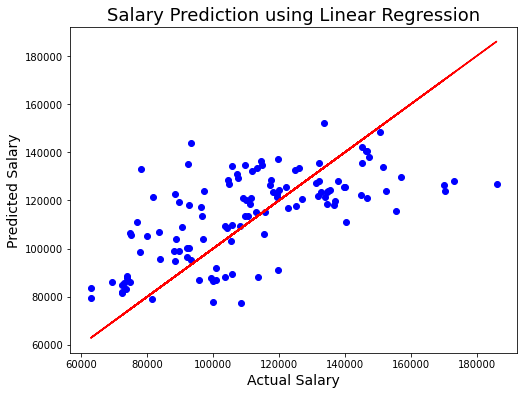

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x= y_test, y= pred_test, color='b')
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Salary", fontsize=14)
plt.ylabel("Predicted Salary", fontsize=14)
plt.title("Salary Prediction using Linear Regression", fontsize=18)
plt.savefig('lr_sal.png')

- Performance of the model is ok. There is a scope for improvement using other techniques

### Regularization

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls_sal = Lasso()
clf_sal = GridSearchCV(ls_sal, parameters)
clf_sal.fit(x_train, y_train)
print(clf_sal.best_params_)

{'alpha': 10, 'random_state': 0}


In [64]:
# Model training based on above best parameters, selected using GridSearchCV
ls_salary = Lasso(alpha = 10, random_state =0)
ls_salary.fit(x_train, y_train)
ls_score_training = ls_salary.score(x_train, y_train)
pred_ls_sal = ls_salary.predict(x_test)
ls_score_training*100

36.432824316578525

In [65]:
lss_salary = r2_score(y_test,pred_ls_sal)
lss_salary*100

39.096632097865836

In [67]:
cv_score_sal = cross_val_score(ls_salary,x1,y1, cv=2)
cv_mean_sal = cv_score_sal.mean()
cv_mean_sal*100

32.84468055686253

### Using Ensemble techniques with Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
parameter_rf = {'criterion': ['mse','mae'], 'max_features':['auto','sqrt','log2']}

In [70]:
rf_sal = RandomForestRegressor()
clf_rf_sal = GridSearchCV(rf_sal, parameter_rf)
clf_rf_sal.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [71]:
clf_rf_sal.best_params_

{'criterion': 'mae', 'max_features': 'sqrt'}

In [73]:
# Best criterion and max feature as per GridSearchCV ar 'mae' and 'sqrt'
rf_salary = RandomForestRegressor(criterion='mae', max_features ='sqrt')
rf_salary.fit(x_train, y_train)
rf_salary.score(x_train, y_train)

0.8372630536665167

In [75]:
pred_rf_sal = rf_salary.predict(x_test)
print("------Predicted Salary using Random Forest Regression with Ensemble technique-----")
pred_rf_sal

------Predicted Salary using Random Forest Regression with Ensemble technique-----


array([142846.415, 119044.505, 112929.015, 116192.53 , 118435.105,
       127270.725, 147252.475, 134341.385,  83770.82 , 109863.32 ,
       122380.44 , 133786.71 , 119838.595,  76856.105, 113091.45 ,
        91500.21 , 102866.565,  83254.9  , 130624.99 ,  77037.38 ,
       141733.82 , 125113.61 ,  99879.93 , 115747.33 ,  73068.37 ,
       124697.39 , 108063.97 , 111825.75 , 109564.72 , 116730.25 ,
        80599.3  , 153113.745, 136479.12 , 109911.045, 114861.33 ,
       140879.27 , 125338.845, 115624.63 ,  99262.39 ,  83637.48 ,
       153145.275, 146662.18 ,  95624.3  , 127064.63 ,  97611.26 ,
       133367.415, 127160.94 , 115809.09 , 131776.9  , 108638.2  ,
       144641.41 , 147189.1  , 140157.01 , 147862.07 , 115998.43 ,
       116895.375, 129965.5  ,  88535.91 , 130215.605,  76884.77 ,
        95624.3  ,  91500.21 , 134211.715,  82575.69 , 125821.875,
       131499.13 ,  79974.535, 105274.255,  74397.18 ,  82877.31 ,
       128414.435,  80471.105,  85440.68 ,  70857.93 , 131903.

In [76]:
rfs_sal = r2_score(y_test,pred_rf_sal)
print(f"The r2 score is {rfs_sal*100}")

The r2 score is 46.40158195442303


In [84]:
# Using Cross validation for Random forest regressor
rf_cv_sal = cross_val_score(rf_salary, x1,y1, cv= 2)
rfc_sal = rf_cv_sal.mean()
print(f'Cross validation score for Random forest is: {rfc_sal*100}')

Cross validation score for Random forest is: 31.875318752603228


##### Out of the models trained the random forest regressor model score is better than others

In [86]:
import pickle
filename = 'Salary.pkl'
pickle.dump(rf_salary, open(filename,'wb'))

##### Conclusion

In [87]:
salary_model = pickle.load(open('Salary.pkl', 'rb'))
salary_result = salary_model.score(x_test, y_test)
print(salary_result*100)

46.40158195442303


In [90]:
salary_conclusion = pd.DataFrame([salary_model.predict(x_test)[:],y_test[:]], index=['Predicted', 'Original'])
salary_conclusion

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Predicted,142846.415,119044.505,112929.015,116192.53,118435.105,127270.725,147252.475,134341.385,83770.82,109863.32,...,125223.93,121393.14,95325.795,150546.82,122876.42,127162.175,113032.985,99973.815,146021.41,106472.615
Original,135585.000,90450.000,110515.000,111350.00,97150.000,113398.000,134550.000,133900.000,88825.00,83900.00,...,104428.00,105668.00,100000.000,151445.00,122875.00,136660.000,88600.000,99247.000,92391.00,96614.000
